## **Import Library**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

## **Import Dataset**

In [ ]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.shape

(13320, 9)

In [ ]:
df.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


# **Clearing Data**

In [ ]:
df1 = df.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df1.isna().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
df2 = df1.dropna()
df2.isna().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0])) # 0 = ambil index pertama
df2['bhk'].unique()


<ipython-input-8-7fa93f785439>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0])) # 0 = ambil index pertama


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df2[df2['bhk'] > 20] #outlier ?

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
  try:
    float(x) # apakah data tersebut tidak string ? krn klo string di gabisa di float
  except:
    return False
  return True

In [ ]:
df2.total_sqft[~df2.total_sqft.apply(is_float)].head() #190rows

,total_sqft
30,2100 - 2850
122,3067 - 8156
137,1042 - 1105
165,1145 - 1340
188,1015 - 1540


## **Hitung Rata-rata dari range**

In [ ]:
def convert_sqft_to_num(x):
  tokens = x.split(' - ')
  if len(tokens) == 2:
    return (float(tokens[0]) + float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [ ]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3['total_sqft'].head()

,total_sqft
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0


In [ ]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
df3.loc[50]

,50
location,Adarsh Nagar
size,2 BHK
total_sqft,1270.0
bath,2.0
price,50.0
bhk,2


In [ ]:
df3[df3.index == 50]

,location,size,total_sqft,bath,price,bhk
50,Adarsh Nagar,2 BHK,1270.0,2.0,50.0,2


# **Feature Engineering**

##**Buat kolum total_sqft / price**



In [ ]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft'] #1lakh = 100.000 rupee
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## **Buang Tipe Lokasi kurang dari 10**

In [ ]:
df4.location.value_counts() #check jumlah agg tiap location

,count
location,
Whitefield,534
Sarjapur Road,392
Electronic City,302
Kanakpura Road,266
Thanisandra,233
...,...
Vidyapeeta,1
Maruthi Extension,1
Okalipura,1


In [ ]:
df4.location = df4.location.apply(lambda x: x.strip())

location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10] #1052 rows merupakan outlier
len(location_stats_less_than_10)

1052

In [ ]:
df4.location = df4.location.apply(lambda x: 'outlier' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [ ]:
df4.location.value_counts()

,count
location,
outlier,2881
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
...,...
Nehru Nagar,11
Banjara Layout,11
LB Shastri Nagar,11


## **Outlier Removal**


In [ ]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,outlier,6 Bedroom,1020.0,6.0,370.00,6,36274.509804




> Example : 1 room = +- 300 sqft

1 kamar kurang lebih luasnyas 300



In [ ]:
df4[df4.total_sqft/df4.bhk < 300] #outlier 744 rows dari 13k

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,outlier,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,outlier,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,outlier,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,outlier,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [ ]:
df5 = df4[~(df4.total_sqft/df4.bhk < 300)]
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df5.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [ ]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out

In [ ]:
df6 = remove_pps_outliers(df5)
df6.shape

(10241, 7)

In [ ]:
df6.location.value_counts()

,count
location,
outlier,2301
Whitefield,479
Sarjapur Road,296
Electronic City,279
Kanakpura Road,190
...,...
Vishveshwarya Layout,4
HAL 2nd Stage,4
Thyagaraja Nagar,4


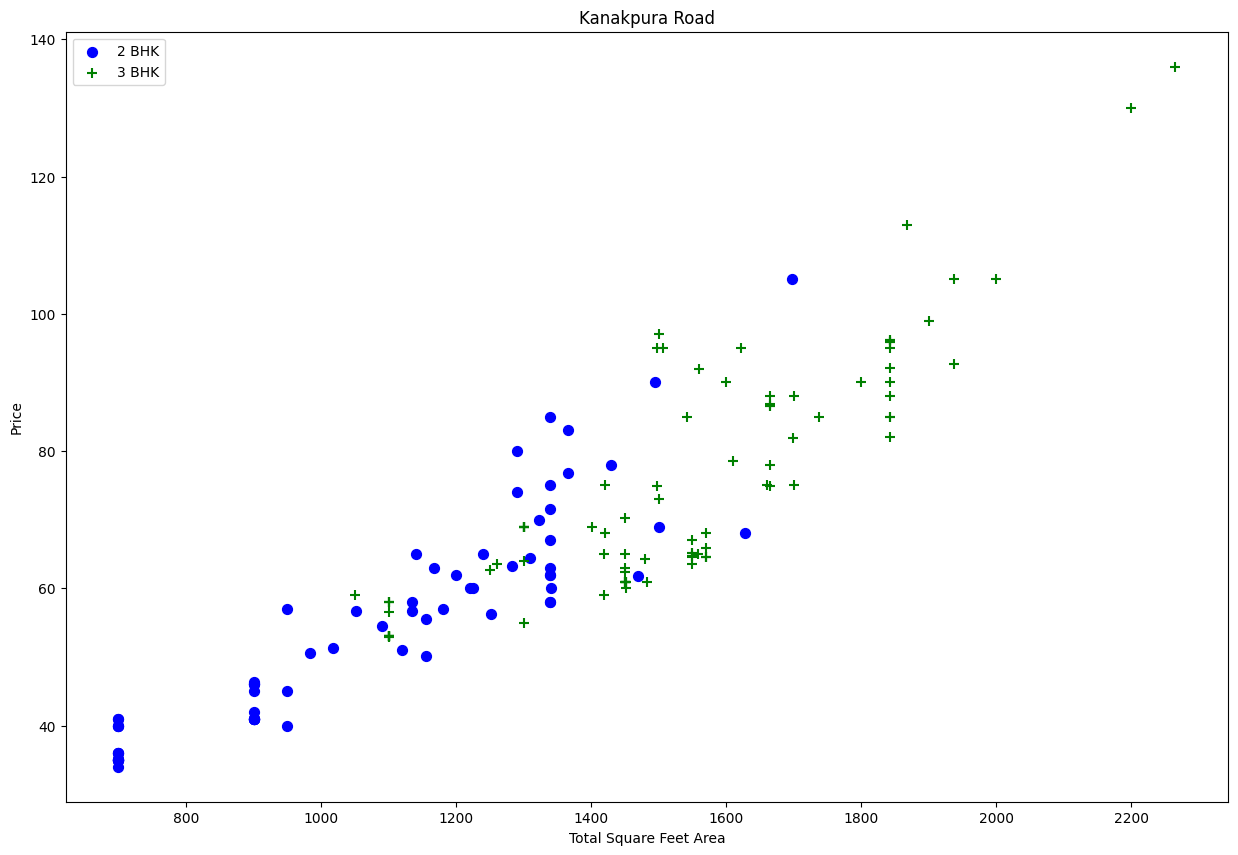

In [ ]:
def plot_scatter_chart(df, location):
  bhk2 = df[(df.location == location) & (df.bhk == 2)]
  bhk3 = df[(df.location == location) & (df.bhk == 3)]
  matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
  plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
  plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', marker = '+', label = '3 BHK', s = 50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price')
  plt.title(location)
  plt.legend()

plot_scatter_chart(df6, 'Kanakpura Road')

We should also remove properties where for same location, the price of (for example) 3 bedroom apart is less than 2 bedroom apart (with  same square ft area). What we'll do is for a given location, we will build a dictionary of stats per bhk, i.e



```
{
  '1' : {
      'mean' : 4000,
      'std' : 2000,
      'count' : 34
  },
  '2' : {
      'mean' : 4300,
      'std' : 2300,
      'count' : 22
  },
}
```

Now we can remove those 2 BHK apart whose price_per_sqft is less than mean price_per_sqft of 1 BHK apart

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
      bhk_stats = {}
      for bhk, bhk_df in location_df.groupby('bhk'):
          bhk_stats[bhk] = {
            'mean' : np.mean(bhk_df.price_per_sqft),
            'std' : np.std(bhk_df.price_per_sqft),
            'count' : bhk_df.shape[0]
          }
      for bhk, bhk_df in location_df.groupby('bhk'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count'] > 5:
          exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df7 = remove_bhk_outliers(df6)
df7.shape

(7329, 7)

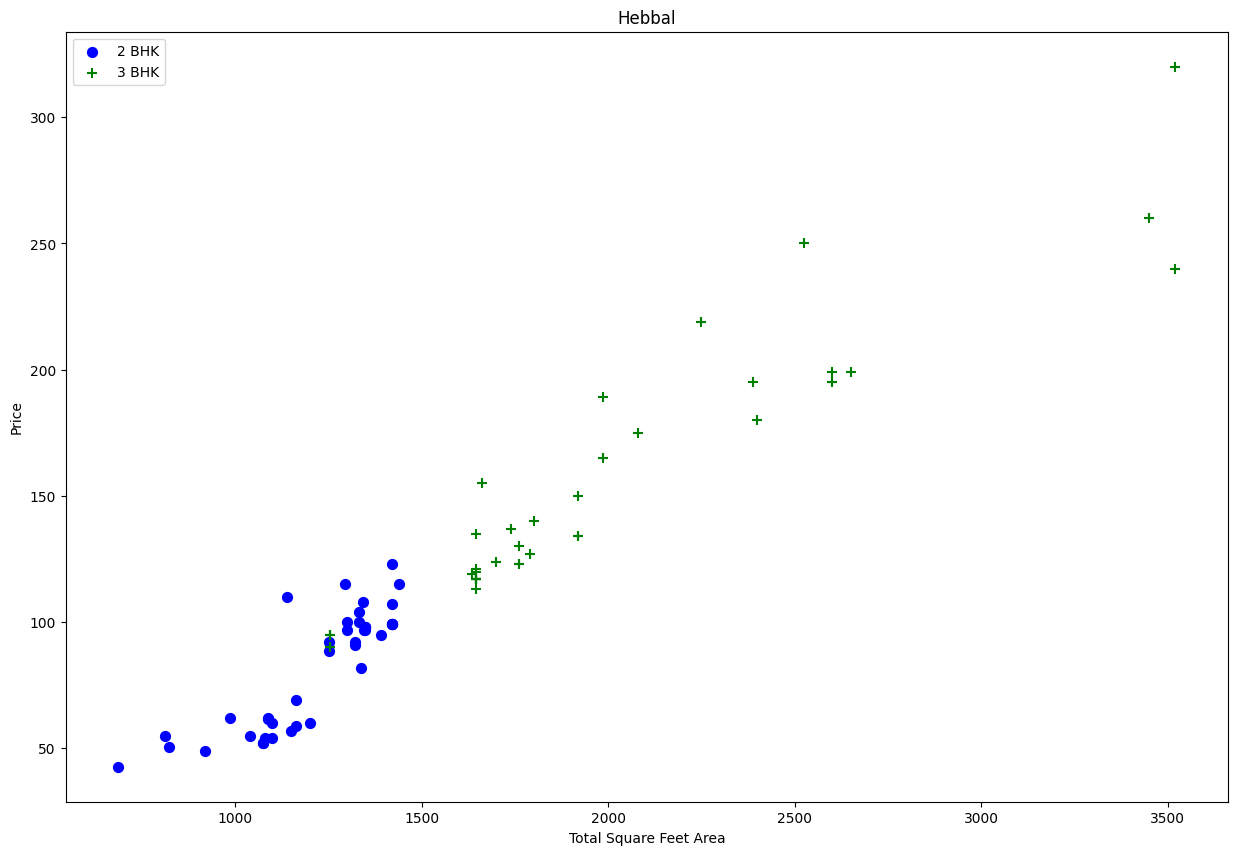

In [ ]:
plot_scatter_chart(df7, 'Hebbal')

Text(0, 0.5, 'Count')

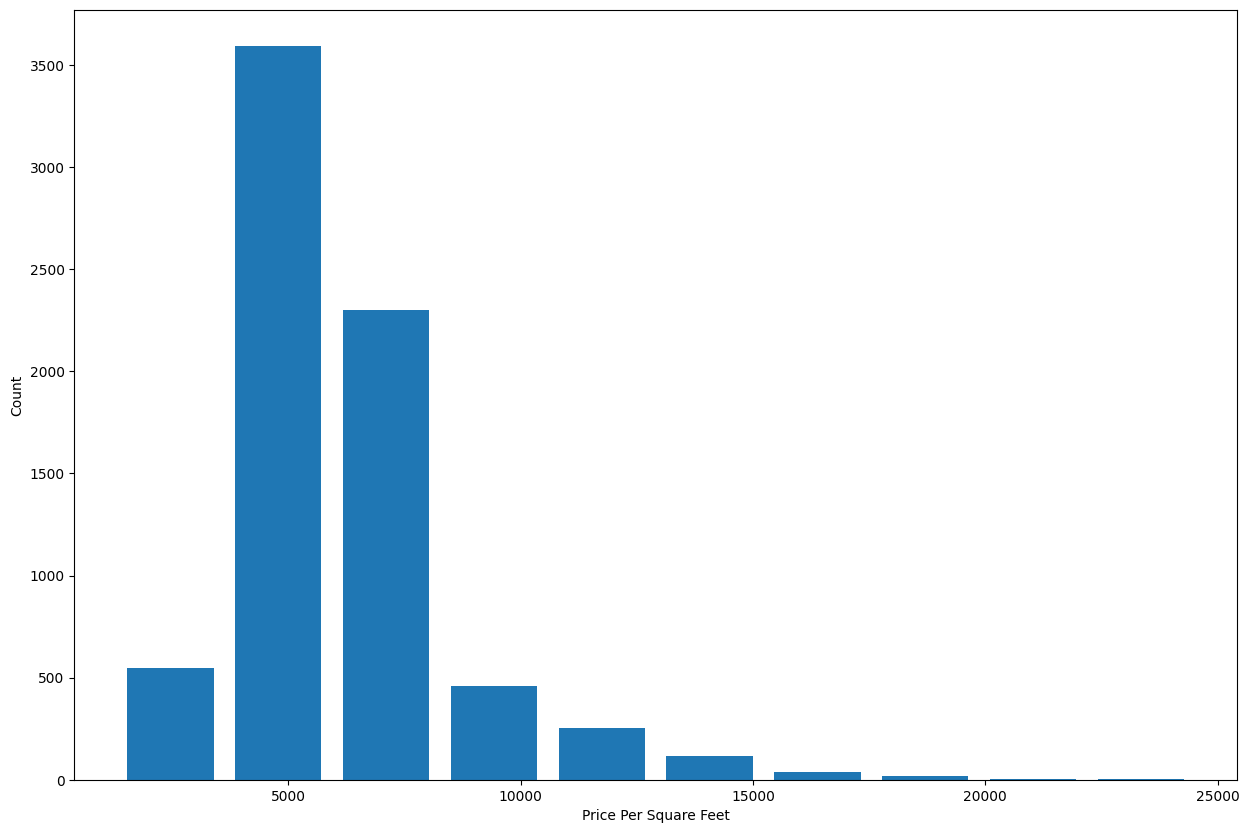

In [ ]:
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
#

In [ ]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

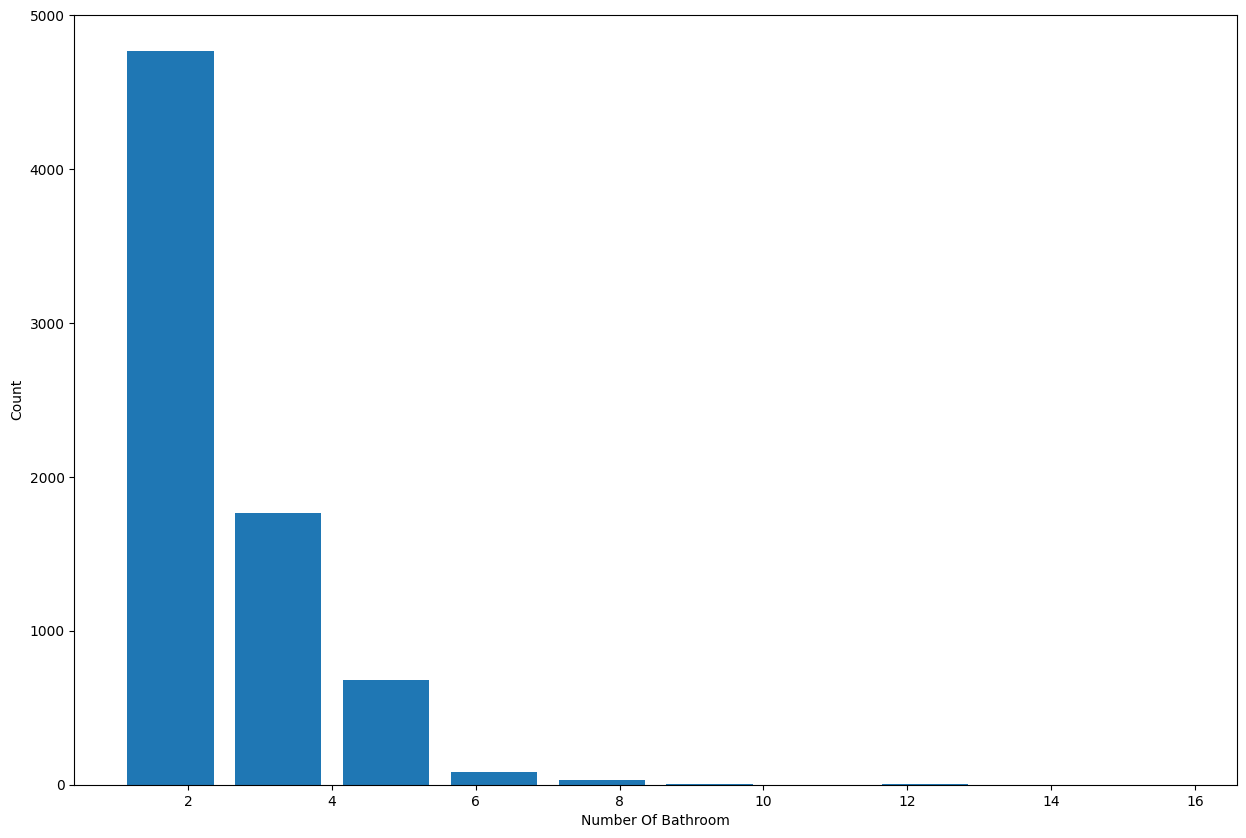

In [ ]:
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel('Number Of Bathroom')
plt.ylabel('Count')

jika ada apartemen dengan 2 kamar mandi lebih banyak dari pada kamar tidurnya maka dianggap sebagai outlier

In [ ]:
df7[df7.bath > df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,outlier,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
df8 = df7[df7.bath < df7.bhk+2]
df8.shape
#

(7251, 7)

In [ ]:
df_final = df8.drop(['size', 'price_per_sqft'], axis = 'columns')
df_final

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,outlier,1200.0,2.0,70.0,2
10233,outlier,1800.0,1.0,200.0,1
10236,outlier,1353.0,2.0,110.0,2
10237,outlier,812.0,1.0,26.0,1


## **Build Model**

In [ ]:
dummies = pd.get_dummies(df_final.location)
df10 = pd.concat([df_final, dummies.drop('outlier', axis=1)], axis = 'columns')

df10.drop('location', axis=1, inplace=True)
df10.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
X = df10.drop(['price'], axis = 'columns')
y = df10.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)
#0.8452277697874329

0.8452277697874329

In [ ]:
# prompt: import random forest classifier

from sklearn.ensemble import RandomForestClassifier #tidak bisa dipakai, karena cocok untuk targer bersifat multiclass (merah, biru, dll)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)


In [ ]:
# prompt: import desicion tree

from sklearn.tree import DecisionTreeRegressor
dtr_clf = DecisionTreeRegressor()
dtr_clf.fit(X_train, y_train)
dtr_clf.score(X_test, y_test)
#0.7231400168639719

0.7231400168639719

In [ ]:
# prompt: import svm

from sklearn.svm import SVR #cocok untuk targer bersifat multiclass (merah, biru, dll)
svr_clf = SVR()
svr_clf.fit(X_train, y_train)
svr_clf.score(X_test, y_test)
#0.6450869012513898


0.6450869012513898

In [ ]:
# prompt: import k fold cross validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv).mean()


0.8183540750696157

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
  model = {
      'linear_regression' : {
          'model' : LinearRegression(),
          'params' : {
              # 'fit_intercept' : [bool, True]
          }
      },
      'lasso' : {
          'model' : Lasso(),
          'params' : {
              'alpha' : [1,2], #arameter alpha mengontrol kekuatan regularisasi. Semakin besar nilai alpha, semakin kuat penalti regularisasi dan semakin besar pengurangan pada koefisien regresi.
              'selection' : ['random', 'cyclic']
          }
      },
      'Desicion_Tree' : {
          'model' : DecisionTreeRegressor(),
          'params' : {
              'criterion' : ['mse', 'friedman_mse'],
              'splitter' : ['best', 'random']
          }
      }
  }

  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

  for model_name, mp in model.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = cv, return_train_score = False)
    clf.fit(X, y)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


,model,best_score,best_params
0,linear_regression,0.818354,{}


Resume : Linear Regression Best Model

# **Make Prediction Price**

In [ ]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [ ]:
np.where(X.columns == '1st Phase JP Nagar')[0][0] #mencari indeks ke berapa

4

In [ ]:
# x = np.zeros(len(X.columns))
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
x[0] = 1000
x

array([1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [ ]:
def predict_price(location, sqft, bath, bhk):
  loc_index = np.where(X.columns == location)[0][0] #mencari location index ke berapa?

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_index >= 0: #ex : index ke n , maka indeks ke n tersebut akan bernilai 1 (true)
    x[loc_index] = 1
  return lr_clf.predict([x])[0]


In [ ]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)
#83.49904677188148



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677188148

## **Save Model With Pickle**




In [ ]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
  pickle.dump(lr_clf, f)

### **Import Data Information (X.columns)**

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
  f.write(json.dumps(columns))